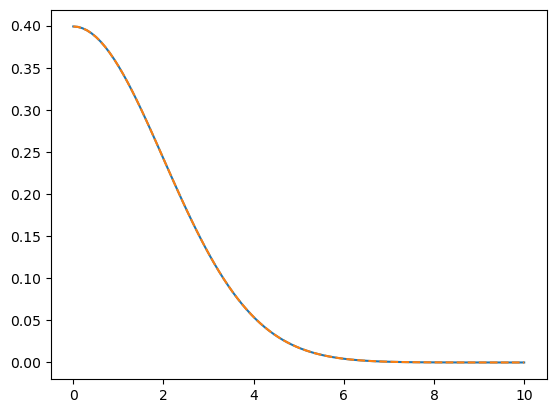

In [121]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.stats
import scipy.special
import utils
import matplotlib.patches as patches

def gt_spec_se(xs, l=1, sigma=1, a=1):
    norm = 1.0 / (np.sqrt(np.pi/2) * sigma**2)
    return norm*(np.exp(-0.5 * l**2 * xs**2) * sigma**2)/np.sqrt(1/l**2)


def gt_spec_rq(xs, l=1, sigma=1, a=1):
    xs = np.maximum(xs, 0.00001)
    norm = 1.0 / (np.sqrt(np.pi/2) * sigma**2)
    return norm*(np.power(2., 5. / 4. - a / 2) * np.power(1 / (a * l * l), -(1. / 4.) - a /
                2) * sigma * sigma * np.power(abs(xs), -0.5 + a) *
                scipy.special.kv(0.5 - a, (np.sqrt(2) * np.abs(xs)) / np.sqrt(1. / (a * l * l)))) / scipy.special.gamma(a)


xs = np.linspace(0, 10, 100)

l = 0.5
sigma = 1

plt.plot(xs, gt_spec_se(xs, l=l, sigma=sigma))
plt.plot(xs, normal_pdf(xs, 0, 1/l)*2, "--")

C:\Users\dario\AppData\Local\Temp\ipykernel_31912\1342692178.py:7: RuntimeWarning: divide by zero encountered in power
  return xs**(a-1) * np.exp(- (a*xs)/b) / ((a/b)**(-a) *scipy.special.gamma(a) )


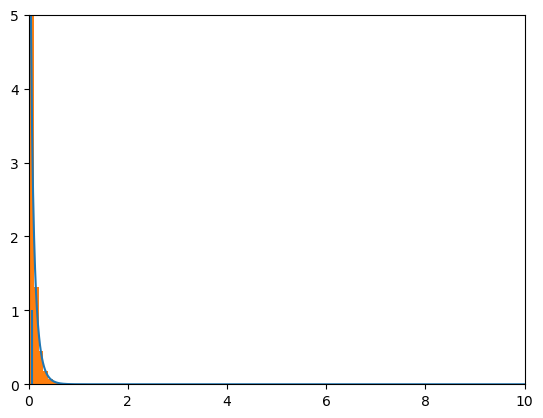

In [122]:
l = 4
sigma = 1
a = 0.5
xs = np.linspace(0, 10, 1000)

def gamma(xs, a, b):
    return xs**(a-1) * np.exp(- (a*xs)/b) / ((a/b)**(-a) *scipy.special.gamma(a) )

def gamma_sample_mean(shape,mean,n=None):
    scale = mean/shape
    return np.random.gamma(shape, scale, n)

plt.plot(xs, gamma(xs,a,1/l**2))
samples = gamma_sample_mean(a,1/l**2,100000)
plt.hist(samples, density=True, range=(0,20), bins=200)
plt.vlines(np.mean(samples), 0, 1)
plt.xlim(0,10)
plt.ylim(0, 5)
plt.show()



(0.0, 1.1)

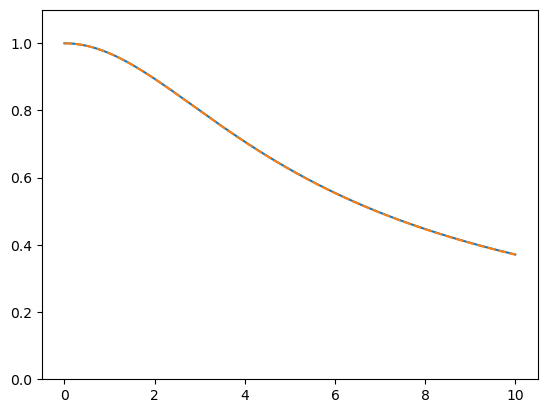

In [123]:
l = 4
sigma = 1
a = 0.5
xs = np.linspace(0, 10, 1000)

def gt_rq(xs, l, sigma, a):
    return sigma**2 * (1 + xs**2/(2*a*l**2))**(-a)

def gt_se(xs, ls, sigma, a=1):
    return sigma**2 * np.exp(- xs**2/(2*ls**2))

plt.plot(xs, gt_rq(xs, l, sigma, a))

samples = np.zeros_like(xs)
n_samples = 100000
for i in range(n_samples):
    tau = gamma_sample_mean(a, 1/l**2)
    ls = 1 / tau ** 0.5
    samples += gt_se(xs, ls, sigma)
samples /= n_samples

plt.plot(xs, samples, "--")

plt.ylim(0, 1.1)

(0.0, 1.1)

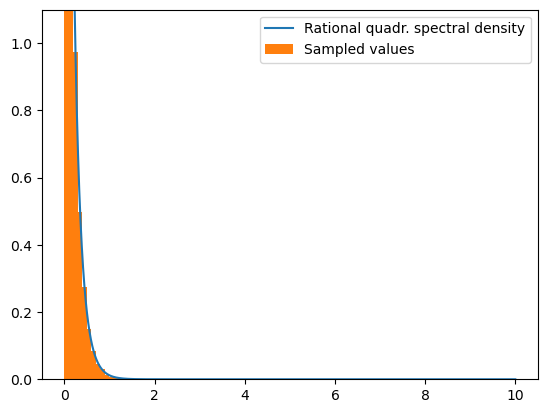

In [124]:
l = 5
sigma = 1
a = 0.5
xs = np.linspace(0, 10, 100000)

plt.plot(xs, gt_spec_rq(xs, l=l, sigma=sigma,a=a), label="Rational quadr. spectral density")

samples = []
for i in range(100000):
    tau = gamma_sample_mean(a, 1/l**2)
    ls = 1 / tau ** 0.5
    samples.append(np.abs(np.random.normal(0,1/ls)))

plt.hist(samples, density=True, range=(0,10), bins=100, label="Sampled values")
plt.legend()
plt.ylim(0, 1.1)

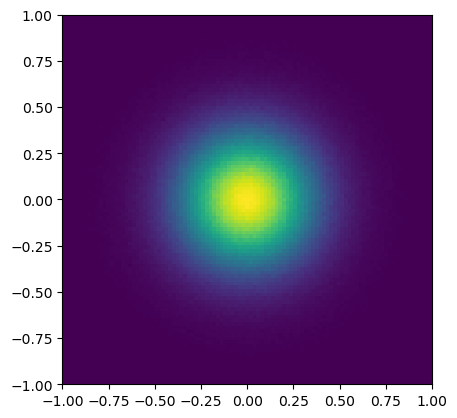

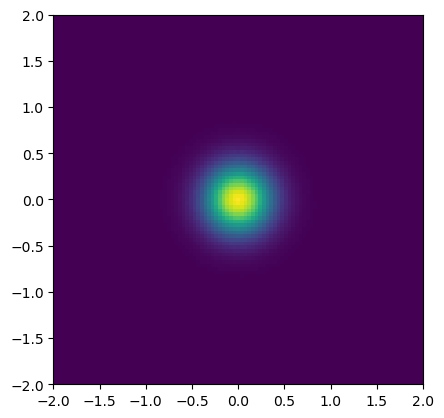

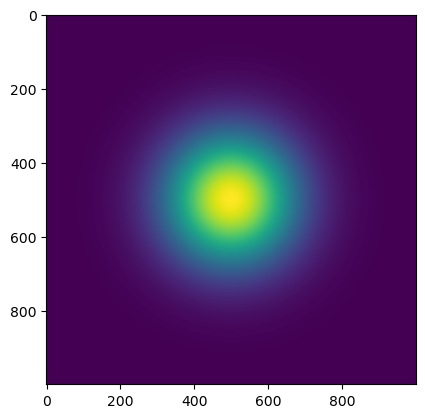

In [186]:
import mpmath
import sympy

ls = 4
a = 0.5

def spherical_to_cartesian(rad,angle):
    return np.sin(angle) * rad, np.cos(angle) * rad

def sample_se_spec(n,ls=3, a=1):
    return np.abs(np.random.normal(0,1/ls,size=n))

def sample_rq_spec(n,ls=3,a=0.5):
    tau = gamma_sample_mean(a, 1/ls**2, n)
    ls_t = 1 / tau ** 0.5
    return np.abs(np.random.normal(0,1/ls_t))

def sample_2d(n,spec_f,**kw_args):
    rad = spec_f(n,**kw_args)
    angle = np.random.uniform(0, np.pi*2,size=n)
    return *spherical_to_cartesian(rad,angle),rad

plt_range = (-1,1)
xs,ys,weights = sample_2d(10000000, sample_se_spec, ls=ls, a=a)
plt.hist2d(xs,ys, weights=weights, bins=101, range=(plt_range,plt_range))
plt.gca().set_aspect("equal")
plt.show()

def sample_2d_se(n,ls=3,a=1):
    rad = (np.sqrt(2) * np.sqrt(-np.log(np.random.uniform(0.,1.,n))))/ls
    angle = np.random.uniform(0, np.pi*2,size=n)
    return *spherical_to_cartesian(rad,angle),np.ones_like(xs)

def sample_2d_rq(n,ls=3,a=0.5):
    rad = 2 * np.sqrt(gamma_sample_mean(a, 0.5/ls**2, n)) * np.sqrt(-np.log(np.random.uniform(0., 1.,size=n)))
    angle = np.random.uniform(0, np.pi*2,size=n)
    return *spherical_to_cartesian(rad,angle),np.ones_like(xs)

xs,ys,weights = sample_2d_se(10000000, ls=ls, a=a)
plt.hist2d(xs,ys, weights=weights, bins=101, range=((-2,2),(-2,2)))
plt.gca().set_aspect("equal")
plt.show()

def csc(x):
    return 1 / np.sin(x)

def gt_spec2d_rq(u,t,l,a,s=1):
    return (2**(1/2 - a/2) * a**((2 + a)/2) * l**(2 + a) * np.pi * ((np.sqrt(a)* l)/np.sqrt(1/(t**2 + u**2)))**-a * (1/(t**2 + u**2))**(-a/2)* (np.sqrt(a) *l* np.sqrt(t**2 + u**2))**(-1 - a) * s**2 * (-(np.sqrt(a) * l * np.sqrt(t**2 + u**2))**(2 * a) * scipy.special.iv(1 - a, np.sqrt(2)* np.sqrt(a)* l* np.sqrt(t**2 + u**2)) + ((np.sqrt(a)* l)/np.sqrt(1/(t**2 + u**2)))**(2 *a) *scipy.special.iv(-1 + a, np.sqrt(2) *np.sqrt(a) *l* np.sqrt(t**2 + u**2))) * csc(a * np.pi))/scipy.special.gamma(a)

def gt_spec2d_se(u,t,l,a,s=1.):
    norm = np.sqrt(0.5 * np.pi)/(2 * np.pi * s**2)
    return norm * (np.exp(-((t**2 + u**2)/(2 * np.sqrt(1/l**4)))) * s**2)/np.sqrt(1/l**4)

xx = np.linspace(*plt_range,1000)
xxs, xxy = np.meshgrid(xx,xx)

rad = np.sqrt(xxs**2 + xxy**2)
spec = gt_spec_se(rad,l=ls,a=a)

plt.imshow(spec)
plt.show()


In [ ]:
print(gt_spec_rq(0, 4, 1, 1))
print(gt_spec_rq(0, 4, 1, 0.7))
print(gt_spec_rq(0, 4, 1, 0.5))
print(gt_spec_rq(0, 4, 1, 0.1))


5.656534258543176
9.274828660725367
26.08247154462102
2572.4650966513004
